# Real Estate Price Prediction - Exploratory Data Analysis (EDA) and Front-End Mockup


*Colombia | Team 181*


In this notebook, we will present the EDA for our main data set to understand the data before the modeling stage. This notebook is structured as follows:

1. Data dictionary: Here we will show a description of the features available.

2. Basic EDA: We will perform a basic exploration of the complete data set (with data from the whole country) analyzing missing and unique values and descriptive statistics.

3. In-depth EDA: In this section, we will filter the properties for sales in Bogotá according to our project scope and performance a more deeply exploration using different data visualizations like boxplots, histograms, maps, correlation matrices, etc. We will also analyze missing and unique values.

4. Front-End Mockup: Here we will show some images of the front-end design.


## Data dictionary

1. id - id of the property.
2. type - Type of property. E.g:
  * Property.
3. start_date - Date of registration of the property.
4. end_date - Cancellation date of the property.
5. created_on - Date of registration of the first version of the publication.
6. lat - Latitude of the property.
7. lon - Longitud of the property.
8. l1 - Administrative Level 1: Country of the property. E.g:
  * Colombia
9. l2 - Administrative Level 2: Usually the province of the property. E.g:
  * Cundinamarca
  * Valle
  * Antioquia
10. l3 - Administrative Level 3: Usually the city of the property. E.g:
  * Bogotá D.C
  * Medellín
  * Cali
11. l4 - Administrative Level 4: Usually the city commune/zone of the property. E.g:
  * El Poblado
  * Zona Chapinero
  * Zona Norte
12. l5 - Administrative Level 5: Usually the city locality of the property (only applies to Bogotá). E.g:
  * Usaquén
  * Chapinero
  * Suba
13. l6 - Administrative Level 6: Usually the neighbourhood of the property (only applies to Bogotá). E.g:
  * Chico Reservado     
  * Santa Barbara        
  * Cedritos
14. rooms - Number of rooms.
15. bedrooms - Number of bedrooms.
16. bathrooms - Number of bathrooms.
17. surface_total - Total area in m².
18. surface_covered - Area covered in m².
19. price - Price published.
20. currency - Currency of published price. E.g:
  * Colombian Pesos (COP)
21. price_period - Payment periods. E.g:
  * Monthly.
22. title - Title of the listing (In Spanish).
23. description - Description of the listing (In Spanish).
24. property_type - Type of property. E.g:
 * House.
 * Apartment.
 * Farm.
25. operation_type - Type of listing. E.g:
 * Sale.
 * Rent.

Data Source: <a href='https://www.properati.com.co'>Properati</a>

In [32]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
#Import libraries
import matplotlib.pyplot    as plt
import missingno            as msno
import numpy                as np
import pandas               as pd
import plotly.express       as px
import plotly.graph_objects as go
import re
import seaborn              as sns
import warnings

sns.set_theme(style="white")

warnings.filterwarnings('ignore')

#Use this code to mount google drive folders and access to the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Basic EDA

Let's read the data and see the first and last rows:

In [34]:
#Read input data
raw_data_dir = '/content/drive/MyDrive/DS4A/data/raw/'
image_dir = '/content/drive/MyDrive/DS4A/reports/figures/'

df = pd.read_csv(raw_data_dir+'co_properties.csv.gz',
                 compression='gzip')
df.head(5)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,KsjahK62rxcYKXXQjOdkqw==,Propiedad,2020-10-07,2021-10-09,2020-10-07,3.9210,-76.506000,Colombia,Valle del Cauca,NaN,...,7.0,NaN,NaN,1.300000e+09,COP,NaN,Casa Campestre en venta en darien 3469064,"HERMOSA CASA CAMPESTRE, &Aacute;REA 6,000 MT, ...",Casa,Venta
1,Y+gsBZYq1zu5NoR3V5oUGA==,Propiedad,2020-10-07,2021-01-06,2020-10-07,3.3577,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,NaN,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
2,Jpzqxj8/Vgf3Aa5ASxUBNg==,Propiedad,2020-10-07,2020-10-07,2020-10-07,3.3577,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,Mensual,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
3,ieuFnkFx/yHDD66iMV14Gw==,Propiedad,2020-10-07,2021-04-12,2020-10-07,3.3640,-76.538000,Colombia,Valle del Cauca,Cali,...,8.0,NaN,NaN,3.500000e+09,COP,NaN,Casa en venta en pance 1630426,"EXCELENTE CASA - LOTE 6,373 MT, EN OBRA GRIS U...",Casa,Venta
4,g4u5JM+hAHEk8SukRSjMzg==,Propiedad,2020-10-07,9999-12-31,2020-10-07,3.3910,-76.517000,Colombia,Valle del Cauca,Cali,...,9.0,NaN,NaN,4.800000e+08,COP,NaN,CASA EXTERNA BARRIO CIUDAD 2000,"CASA EXTERNA EN EL BARRIO CIUDAD 2000,CONSTRUI...",Casa,Venta


In [35]:
df.tail(5)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
999995,HogfsSTtBvNDJkf98/FGIw==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,700000.0,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999996,1LxE1UMbfMeW5Dv/z4rqJA==,Propiedad,2021-03-31,2021-05-18,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,700000.0,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999997,NEIrzJXLpHqPDIXwD+9r8w==,Propiedad,2021-03-31,2021-05-07,2021-03-31,6.186412,-75.658630,Colombia,Antioquia,Medellín,...,1.0,NaN,NaN,700000.0,COP,NaN,"APARTAMENTO EN ARRIENDO, SAN ANTONIO DE PRADO-...",Apartamento de 48 Mts2 ubicado en conjunto cer...,Apartamento,Arriendo
999998,fpxqXlGPqDwKhuZVQGxCPA==,Propiedad,2021-03-31,9999-12-31,2021-03-31,11.015336,-74.831347,Colombia,Atlántico,Barranquilla,...,4.0,NaN,NaN,700000000.0,COP,NaN,Casa en venta La Castellana,<b>Casa en venta La Castellana</b><br><br>Herm...,Casa,Venta
999999,ZU6bNwudfah9N7ma06509Q==,Propiedad,2021-03-31,9999-12-31,2021-03-31,11.017029,-74.834101,Colombia,Atlántico,Barranquilla,...,NaN,NaN,NaN,645000000.0,COP,NaN,VENTA DE APARTAMENTO EN ZONA EXCLUSIVA DEL N...,HERMOSO APARTAMENTO UBICADO EN ZONA EXCLUSIVA ...,Apartamento,Venta


Now we check the index dtype and column dtypes, non-null values and memory usage: 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              740281 non-null   float64
 6   lon              740282 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               937188 non-null   object 
 10  l4               273995 non-null   object 
 11  l5               159127 non-null   object 
 12  l6               54747 non-null    object 
 13  rooms            172087 non-null   float64
 14  bedrooms         376046 non-null   float64
 15  bathrooms        799493 non-null   float64
 16  surface_total    41

Let's explore the date columns and convert them to datetime:

In [37]:
#Let's explore date columns
df[['start_date', 'end_date', 'created_on']].apply(pd.value_counts)\
.sort_values(by='end_date' , ascending=False)

,start_date,end_date,created_on
9999-12-31,NaN,143986,NaN
2020-08-27,13627.0,9544,13627.0
2020-11-13,NaN,9483,NaN
2021-02-15,9578.0,8945,9578.0
2021-02-16,9186.0,7560,9186.0
...,...,...,...
2021-09-26,NaN,54,NaN
2021-07-11,185.0,54,185.0
2021-09-12,NaN,52,NaN
2021-10-03,NaN,47,NaN


There are many properties with `end_date = '9999-12-31'`. This could happen because the company does not want to stablish a `end_date` due to the property has not been sold yet.

In [38]:
#Change data types to date
# We will coerce '9999-12-31' to NaT
df[['start_date', 'end_date', 'created_on']] = df[['start_date', 'end_date','created_on']].apply(pd.to_datetime, format = '%Y-%m-%d', errors = 'coerce')


In [39]:
df.head(10)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,KsjahK62rxcYKXXQjOdkqw==,Propiedad,2020-10-07,2021-10-09,2020-10-07,3.9210,-76.506000,Colombia,Valle del Cauca,NaN,...,7.0,NaN,NaN,1.300000e+09,COP,NaN,Casa Campestre en venta en darien 3469064,"HERMOSA CASA CAMPESTRE, &Aacute;REA 6,000 MT, ...",Casa,Venta
1,Y+gsBZYq1zu5NoR3V5oUGA==,Propiedad,2020-10-07,2021-01-06,2020-10-07,3.3577,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,NaN,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
2,Jpzqxj8/Vgf3Aa5ASxUBNg==,Propiedad,2020-10-07,2020-10-07,2020-10-07,3.3577,-76.541811,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+09,COP,Mensual,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
3,ieuFnkFx/yHDD66iMV14Gw==,Propiedad,2020-10-07,2021-04-12,2020-10-07,3.3640,-76.538000,Colombia,Valle del Cauca,Cali,...,8.0,NaN,NaN,3.500000e+09,COP,NaN,Casa en venta en pance 1630426,"EXCELENTE CASA - LOTE 6,373 MT, EN OBRA GRIS U...",Casa,Venta
4,g4u5JM+hAHEk8SukRSjMzg==,Propiedad,2020-10-07,NaT,2020-10-07,3.3910,-76.517000,Colombia,Valle del Cauca,Cali,...,9.0,NaN,NaN,4.800000e+08,COP,NaN,CASA EXTERNA BARRIO CIUDAD 2000,"CASA EXTERNA EN EL BARRIO CIUDAD 2000,CONSTRUI...",Casa,Venta
5,+S9T8NKJ/yyndMxxRz1emQ==,Propiedad,2020-10-07,NaT,2020-10-07,3.4130,-76.544000,Colombia,Valle del Cauca,Cali,...,10.0,NaN,NaN,1.400000e+09,COP,NaN,CASA PARA VENTA NUEVA TEQUENDAMA,"CASA EXTERNA CONSTRUIDA EN TRES PISOS , EN EL ...",Casa,Venta
6,0DBic9QJv2FL9Oq0S+xaSA==,Propiedad,2020-10-07,2020-10-22,2020-10-07,3.4510,-76.532000,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,2.800000e+08,COP,NaN,Casa en venta en zona norte 3558799,CASA EN PASAJE NO V&Iacute;A VEHICULAR UBICADA...,Casa,Venta
7,0/S4PBWArkYd3NDMyZZtPQ==,Propiedad,2020-10-07,2021-06-22,2020-10-07,3.4270,-76.542000,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,5.300000e+08,COP,NaN,Casa en venta en san fernando 3476093,"VENDE CASA EN EL SECTOR DE SAN FERNANDO VIEJO,...",Casa,Venta
8,mrYI162HS5qJaAFN2WpP2Q==,Propiedad,2020-10-07,2021-02-11,2020-10-07,3.3640,-76.538000,Colombia,Valle del Cauca,Cali,...,9.0,NaN,NaN,7.000000e+06,COP,NaN,ALQUILA EXCELENTE CASA EN CIUDAD JARDIN,EXCELENTE VIVIENDA UBICADA SOBRE VIA PRINCIPAL...,Casa,Arriendo
9,3q8MmfVZHtWJa6pxNnypeg==,Propiedad,2020-10-07,NaT,2020-10-07,3.5650,-76.551000,Colombia,Valle del Cauca,Cali,...,7.0,NaN,NaN,1.700000e+09,COP,NaN,HERMOSA CASA EN VENTA EN JAMUNDÍ 2844215,"EXCELENTE CASA EN CONDOMINIO EXCLUSIVO, &Aacut...",Casa,Venta


Now let's describe the dataset:

In [40]:
df.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,1000000,1000000,KsjahK62rxcYKXXQjOdkqw==,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_type,1000000,1,Propiedad,1000000,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_date,1000000,371,2020-08-27 00:00:00,13627,2020-07-26,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_date,856014,448,2020-08-27 00:00:00,9544,2020-07-26,2021-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_on,1000000,371,2020-08-27 00:00:00,13627,2020-07-26,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,740281.0,NaN,NaN,NaN,NaT,NaT,5.822493,2.239672,-75.64033,4.642,5.04702,6.336598,85.051129
lon,740282.0,NaN,NaN,NaN,NaT,NaT,-74.894785,1.309072,-180.0,-75.603426,-75.107489,-74.055889,100.477498
l1,1000000,2,Colombia,999998,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2,1000000,32,Antioquia,341453,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l3,937188,343,Medellín,262856,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above table we can conclude:

* We have data of postings created from 2020-07-26 to 2021-08-19, almost 13 months.
* There are 1 million rows in this data set.
* `Created_on` and `start_date` seems to be equal. We have to look more deeply.
* Most of the properties are located in Antioquia, Medellín.
* The average property has 3 bedrooms, 2 bathrooms and 100m2 
* We have to analyze the amount of missing values in each feature.


### Missing Values

Let's see the number and percentage of missing values for each feature:

In [41]:
count_na = pd.DataFrame(df.isna().sum()).reset_index().rename(columns={'index':'Feature', 0:'Count_NA'})
count_na['Per_NA'] = count_na['Count_NA']/df.shape[0]
count_na

,Feature,Count_NA,Per_NA
0,id,0,0.000000
1,ad_type,0,0.000000
2,start_date,0,0.000000
3,end_date,143986,0.143986
4,created_on,0,0.000000
5,lat,259719,0.259719
6,lon,259718,0.259718
7,l1,0,0.000000
8,l2,0,0.000000
9,l3,62812,0.062812


From the table above:

* We have a more than 95% of data without surface information.
* The features `I4`, `I5`, `I6` also have many rows with missing values. Apparently, these features only apply to some cities or regions. We have to look more deeply.
* The number of bedrooms and rooms have more than 60% of missing values, but these features seem to have the same meaning.
* It will be necessary to analyze `title` and `description` to extract more information that allows us to impute missing values in the other features.

Now let's look missing values by time and region and see if we found any pattern:

In [42]:
#NaN per regions - lat and long
coord_na = pd.DataFrame(df['lat'].isna().groupby(df['l2']).value_counts()).rename(columns={'lat':'Count_NA'}).reset_index()
coord_na = coord_na.pivot(index = 'l2', columns = 'lat', values = 'Count_NA').reset_index().replace(np.nan, 0)
coord_na['Total'] = coord_na[True] + coord_na[False]
coord_na['Percentage_NA'] = coord_na[True]/coord_na['Total']
coord_na = coord_na.sort_values(by='Total', ascending=False)
coord_na.head(10)

lat,l2,False,True,Total,Percentage_NA
1,Antioquia,144703.0,196750.0,341453.0,0.576214
12,Cundinamarca,194539.0,14379.0,208918.0,0.068826
30,Valle del Cauca,111107.0,6663.0,117770.0,0.056576
3,Atlántico,66318.0,12287.0,78605.0,0.156313
27,Santander,64683.0,7054.0,71737.0,0.098331
6,Caldas,52600.0,3696.0,56296.0,0.065653
22,Norte de Santander,29024.0,3223.0,32247.0,0.099947
25,Risaralda,21691.0,6814.0,28505.0,0.239046
24,Quindío,11325.0,428.0,11753.0,0.036416
4,Bolívar,9724.0,1292.0,11016.0,0.117284


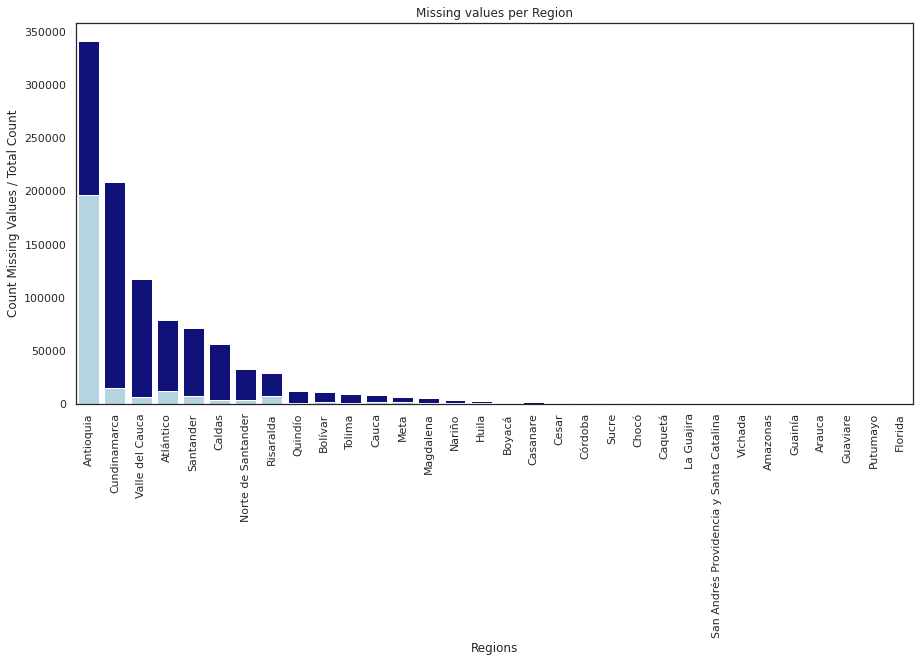

In [43]:
plt.figure(figsize=(15, 7))
sns.barplot(x='l2', y='Total', data=coord_na, color='darkblue')
sns.barplot(x='l2', y=True, data=coord_na, color='lightblue')
plt.xlabel('Regions')
plt.xticks(rotation = 90)
plt.ylabel('Count Missing Values / Total Count')
plt.title('Missing values per Region')
plt.savefig(image_dir+"missing_region.png", bbox_inches="tight")

The percentage of missing values for coordinates features is very high in Antioquia, almost 57% of data with NaN.

In [44]:
#NaN per regions - bedrooms 
bedrooms_na = pd.DataFrame(df['bedrooms'].isna().groupby(df['l2']).value_counts())
bedrooms_na= bedrooms_na.rename(columns={'bedrooms':'Count_NA'}).reset_index()
bedrooms_na = bedrooms_na.pivot(index = 'l2', columns = 'bedrooms', values = 'Count_NA').reset_index().replace(np.nan, 0)
bedrooms_na['Total'] = bedrooms_na[True] + bedrooms_na[False]
bedrooms_na['Percentage_NA'] = bedrooms_na[True]/bedrooms_na['Total']
bedrooms_na = bedrooms_na.sort_values(by='Total', ascending=False)
bedrooms_na.head(10)

bedrooms,l2,False,True,Total,Percentage_NA
1,Antioquia,80347.0,261106.0,341453.0,0.764691
12,Cundinamarca,125372.0,83546.0,208918.0,0.399899
30,Valle del Cauca,49865.0,67905.0,117770.0,0.576590
3,Atlántico,30934.0,47671.0,78605.0,0.606463
27,Santander,17689.0,54048.0,71737.0,0.753419
6,Caldas,14148.0,42148.0,56296.0,0.748686
22,Norte de Santander,16880.0,15367.0,32247.0,0.476540
25,Risaralda,11036.0,17469.0,28505.0,0.612840
24,Quindío,6478.0,5275.0,11753.0,0.448822
4,Bolívar,6592.0,4424.0,11016.0,0.401598


In [45]:
#NaN per regions - rooms 
rooms_na = pd.DataFrame(df['rooms'].isna().groupby(df['l2']).value_counts())
rooms_na = rooms_na.rename(columns={'rooms':'Count_NA'}).reset_index()
rooms_na = rooms_na.pivot(index = 'l2', columns = 'rooms', values = 'Count_NA').reset_index().replace(np.nan, 0)
rooms_na['Total'] = rooms_na[True] + rooms_na[False]
rooms_na['Percentage_NA'] = rooms_na[True]/rooms_na['Total']
rooms_na = rooms_na.sort_values(by='Total', ascending=False)
rooms_na.head(10)

rooms,l2,False,True,Total,Percentage_NA
1,Antioquia,35856.0,305597.0,341453.0,0.894990
12,Cundinamarca,55658.0,153260.0,208918.0,0.733589
30,Valle del Cauca,29218.0,88552.0,117770.0,0.751906
3,Atlántico,12559.0,66046.0,78605.0,0.840226
27,Santander,4181.0,67556.0,71737.0,0.941718
6,Caldas,8235.0,48061.0,56296.0,0.853720
22,Norte de Santander,3972.0,28275.0,32247.0,0.876826
25,Risaralda,7011.0,21494.0,28505.0,0.754043
24,Quindío,5612.0,6141.0,11753.0,0.522505
4,Bolívar,3270.0,7746.0,11016.0,0.703159


In [46]:
#NaN per regions - bathrooms 
bathrooms_na = pd.DataFrame(df['bathrooms'].isna().groupby(df['l2']).value_counts())
bathrooms_na = bathrooms_na.rename(columns={'bathrooms':'Count_NA'}).reset_index()
bathrooms_na = bathrooms_na.pivot(index = 'l2', columns = 'bathrooms', values = 'Count_NA').reset_index().replace(np.nan, 0)
bathrooms_na['Total'] = bathrooms_na[True] + bathrooms_na[False]
bathrooms_na['Percentage_NA'] = bathrooms_na[True]/bathrooms_na['Total']
bathrooms_na = bathrooms_na.sort_values(by='Total', ascending=False)
bathrooms_na.head(10)

bathrooms,l2,False,True,Total,Percentage_NA
1,Antioquia,293643,47810,341453,0.140019
12,Cundinamarca,154453,54465,208918,0.260700
30,Valle del Cauca,90462,27308,117770,0.231876
3,Atlántico,63548,15057,78605,0.191553
27,Santander,64535,7202,71737,0.100394
6,Caldas,42355,13941,56296,0.247637
22,Norte de Santander,28625,3622,32247,0.112321
25,Risaralda,18881,9624,28505,0.337625
24,Quindío,5577,6176,11753,0.525483
4,Bolívar,7668,3348,11016,0.303922


In [47]:
#NaN per regions - l4 
l4_na = pd.DataFrame(df['l4'].isna().groupby(df['l2']).value_counts())
l4_na = l4_na.rename(columns={'l4':'Count_NA'}).reset_index()
l4_na = l4_na.pivot(index = 'l2', columns = 'l4', values = 'Count_NA').reset_index().replace(np.nan, 0)
l4_na['Total'] = l4_na[True] + l4_na[False]
l4_na['Percentage_NA'] = l4_na[True]/l4_na['Total']
l4_na = l4_na.sort_values(by='Total', ascending=False)
l4_na.head(10)

l4,l2,False,True,Total,Percentage_NA
1,Antioquia,78725.0,262728.0,341453.0,0.769441
12,Cundinamarca,169869.0,39049.0,208918.0,0.186911
30,Valle del Cauca,17287.0,100483.0,117770.0,0.853214
3,Atlántico,6184.0,72421.0,78605.0,0.921328
27,Santander,1879.0,69858.0,71737.0,0.973807
6,Caldas,0.0,56296.0,56296.0,1.000000
22,Norte de Santander,0.0,32247.0,32247.0,1.000000
25,Risaralda,0.0,28505.0,28505.0,1.000000
24,Quindío,0.0,11753.0,11753.0,1.000000
4,Bolívar,0.0,11016.0,11016.0,1.000000


In [48]:
#NaN per regions - l5 
l5_na = pd.DataFrame(df['l5'].isna().groupby(df['l2']).value_counts())
l5_na = l5_na.rename(columns={'l5':'Count_NA'}).reset_index()
l5_na = l5_na.pivot(index = 'l2', columns = 'l5', values = 'Count_NA').reset_index().replace(np.nan, 0)
l5_na['Total'] = l5_na[True] + l5_na[False]
l5_na['Percentage_NA'] = l5_na[True]/l5_na['Total']
l5_na = l5_na.sort_values(by='Total', ascending=False)
l5_na.head(10)

l5,l2,False,True,Total,Percentage_NA
1,Antioquia,0.0,341453.0,341453.0,1.000000
12,Cundinamarca,159127.0,49791.0,208918.0,0.238328
30,Valle del Cauca,0.0,117770.0,117770.0,1.000000
3,Atlántico,0.0,78605.0,78605.0,1.000000
27,Santander,0.0,71737.0,71737.0,1.000000
6,Caldas,0.0,56296.0,56296.0,1.000000
22,Norte de Santander,0.0,32247.0,32247.0,1.000000
25,Risaralda,0.0,28505.0,28505.0,1.000000
24,Quindío,0.0,11753.0,11753.0,1.000000
4,Bolívar,0.0,11016.0,11016.0,1.000000


In [49]:
#NaN per regions - l6
l6_na = pd.DataFrame(df['l6'].isna().groupby(df['l2']).value_counts())
l6_na = l6_na.rename(columns={'l6':'Count_NA'}).reset_index()
l6_na = l6_na.pivot(index = 'l2', columns = 'l6', values = 'Count_NA').reset_index().replace(np.nan, 0)
l6_na['Total'] = l6_na[True] + l6_na[False]
l6_na['Percentage_NA'] = l6_na[True]/l6_na['Total']
l6_na = l6_na.sort_values(by='Total', ascending=False)
l6_na.head(10)

l6,l2,False,True,Total,Percentage_NA
1,Antioquia,0.0,341453.0,341453.0,1.00000
12,Cundinamarca,54747.0,154171.0,208918.0,0.73795
30,Valle del Cauca,0.0,117770.0,117770.0,1.00000
3,Atlántico,0.0,78605.0,78605.0,1.00000
27,Santander,0.0,71737.0,71737.0,1.00000
6,Caldas,0.0,56296.0,56296.0,1.00000
22,Norte de Santander,0.0,32247.0,32247.0,1.00000
25,Risaralda,0.0,28505.0,28505.0,1.00000
24,Quindío,0.0,11753.0,11753.0,1.00000
4,Bolívar,0.0,11016.0,11016.0,1.00000


* `lat` and `long` features have high percentage of missing values in Antioquia.
* Cundinamarca has lower percentage of missing values for bedrooms, `l4` y `l5` features.
* There are regions with better data quality so we could select some regions and limit the project scope.

Now let's explore missing values through the time:

In [50]:
#Create year-month column from 'created_on' column
df['created_on_monthly'] = df['created_on'].dt.to_period('M')

#Coordinates NaN by month
coord_na_time = pd.DataFrame(df['lat'].isna().groupby(df['created_on_monthly']).value_counts())
coord_na_time = coord_na_time.rename(columns={'lat':'Count_NA'}).reset_index()
coord_na_time = coord_na_time.pivot(index = 'created_on_monthly', columns = 'lat', values = 'Count_NA').reset_index().replace(np.nan, 0)
coord_na_time['Total'] = coord_na_time[True] + coord_na_time[False]
coord_na_time['Percentage_NA'] = coord_na_time[True]/coord_na_time['Total']
coord_na_time

lat,created_on_monthly,False,True,Total,Percentage_NA
0,2020-07,20368,5653,26021,0.217248
1,2020-08,80643,21028,101671,0.206824
2,2020-09,66356,20286,86642,0.234136
3,2020-10,62217,25069,87286,0.287205
4,2020-11,57418,26770,84188,0.317979
5,2020-12,52428,29105,81533,0.356972
6,2021-01,61714,31580,93294,0.338500
7,2021-02,71222,28447,99669,0.285415
8,2021-03,84354,35068,119422,0.293648
9,2021-04,51758,22013,73771,0.298396


In [51]:
#NaN per regions - bedrooms 
bedrooms_na_time = pd.DataFrame(df['bedrooms'].isna().groupby(df['created_on_monthly']).value_counts())
bedrooms_na_time = bedrooms_na_time.rename(columns={'bedrooms':'Count_NA'}).reset_index()
bedrooms_na_time = bedrooms_na_time.pivot(index = 'created_on_monthly', columns = 'bedrooms', values = 'Count_NA').reset_index().replace(np.nan, 0)
bedrooms_na_time['Total'] = bedrooms_na_time[True] + bedrooms_na_time[False]
bedrooms_na_time['Percentage_NA'] = bedrooms_na_time[True]/bedrooms_na_time['Total']
bedrooms_na_time

bedrooms,created_on_monthly,False,True,Total,Percentage_NA
0,2020-07,4405,21616,26021,0.830714
1,2020-08,15949,85722,101671,0.843131
2,2020-09,15900,70742,86642,0.816486
3,2020-10,17787,69499,87286,0.796222
4,2020-11,19962,64226,84188,0.762888
5,2020-12,20451,61082,81533,0.749169
6,2021-01,22968,70326,93294,0.753811
7,2021-02,34352,65317,99669,0.655339
8,2021-03,51214,68208,119422,0.571151
9,2021-04,37946,35825,73771,0.485624


We see a change in data quality starting in from may-2021. The percentage of null values drop from aprox. 50% to aprox. 7%.

### Unique Values

In [52]:
#Print top 15 of unique values for category columns
category_columns = ['l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'price_period',
                    'property_type', 'operation_type' ]
                    
for col in category_columns:
  unique = df[col].value_counts().head(15)
  print(unique, '\n')

Colombia          999998
Estados Unidos         2
Name: l1, dtype: int64 

Antioquia             341453
Cundinamarca          208918
Valle del Cauca       117770
Atlántico              78605
Santander              71737
Caldas                 56296
Norte de Santander     32247
Risaralda              28505
Quindío                11753
Bolívar                11016
Tolima                  8730
Cauca                   8486
Meta                    6385
Magdalena               5497
Nariño                  3319
Name: l2, dtype: int64 

Medellín         262856
Bogotá D.C       171168
Cali              95401
Barranquilla      74801
Bucaramanga       46595
Manizales         44505
Envigado          24171
Cúcuta            21510
Pereira           18855
Floridablanca     13830
Chía              11103
Sabaneta          10836
Cartagena         10105
Jamundí            8986
Bello              8728
Name: l3, dtype: int64 

Zona Chapinero        49905
Zona Norte            43352
Zona Noroccidental    28

In [53]:
#Start_date and created_on columns are the same
sum(df['start_date'] == df['created_on'])

1000000

In [54]:
#How many properties are for sale in Bogotá D.C? 
df_bog = df.query("operation_type == 'Venta' and l3 == 'Bogotá D.C'").copy()
df_bog.shape[0]

100765

*   There are many types of properties like: apartments, houses, commercial properties, etc.
*   This data set has 2 types of transactions: sale and rent.
*   The number of properties located in Bogotá D.C for sale are 100.765. This subset will be taken for our project scope. 
* `start_date` and `created_on` columns are the same, so we can delete one of them.


## In-Depth EDA

In this section, the sales data for the city of Bogotá will be analyzed in greater depth. First, let's check the missing values:

In [55]:
count_na_bog = pd.DataFrame(df_bog.isna().sum()).reset_index()
count_na_bog = count_na_bog.rename(columns={'index':'Feature', 0:'Count_NA'})
count_na_bog['Per_NA'] = count_na_bog['Count_NA']/df_bog.shape[0]
count_na_bog

,Feature,Count_NA,Per_NA
0,id,0,0.000000
1,ad_type,0,0.000000
2,start_date,0,0.000000
3,end_date,18878,0.187347
4,created_on,0,0.000000
5,lat,6244,0.061966
6,lon,6244,0.061966
7,l1,0,0.000000
8,l2,0,0.000000
9,l3,0,0.000000


The `surface_total`, `surface_covered` and `l6` features have many missing values. We can omit the variable `price_period` since we are focused only on sales transactions. The price, which is our target variable has a little percentage (<1%) of null values. Now let's look at the room and bedroom columns that look very similar:

In [56]:
sum(df_bog['rooms'] == df_bog['bedrooms'])/(df_bog.shape[0])

0.3156949337567608

In [57]:
#rooms and bedrooms are almost the same columns
rooms_bedrooms = df_bog[['rooms', 'bedrooms']].dropna()
sum(rooms_bedrooms['rooms'] == rooms_bedrooms['bedrooms'])/rooms_bedrooms.shape[0]

0.9994344779917685

When missing values are omitted, 99.94% of the values in these two columns are the same. Now let's review the unique values in the different categorical columns:

In [58]:
#Print top 15 of unique values for category columns
for col in category_columns:
  unique = df_bog[col].value_counts().head(15)
  print(unique, '\n')

Colombia    100765
Name: l1, dtype: int64 

Cundinamarca    100765
Name: l2, dtype: int64 

Bogotá D.C    100765
Name: l3, dtype: int64 

Zona Norte            27455
Zona Chapinero        23323
Zona Noroccidental    18687
Zona Occidental       10162
Zona Suroccidental    10045
Zona Centro            5607
Zona Sur               4670
Name: l4, dtype: int64 

Usaquén               27413
Chapinero             16273
Suba                  11343
Kennedy                6515
Engativa               5303
Fontibón               4858
Teusaquillo            3580
Bosa                   3529
Barrios Unidos         3470
Santa Fe               2113
Puente Aranda          1882
Ciudad Bolívar         1165
Los Mártires           1001
Rafael Uribe Uribe      960
Antonio Nariño          794
Name: l5, dtype: int64 

Chico Reservado     5181
Cedritos            4463
Santa Barbara       4298
Los Rosales         1510
Bella Suiza         1139
Ciudad Salitre       855
Modelia              805
El Batán             

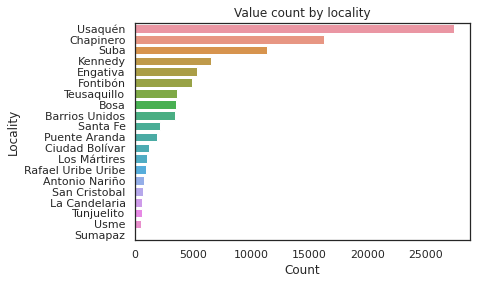

In [59]:
sns.countplot(y="l5", data=df_bog, order = df_bog['l5'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Locality')
plt.title('Value count by locality')
plt.savefig(image_dir+"count_locality.png", bbox_inches="tight")

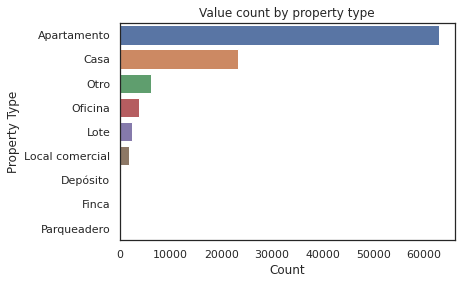

In [60]:
sns.countplot(y="property_type", data=df_bog, order = df_bog['property_type'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.title('Value count by property type')
plt.savefig(image_dir+"count_type.png", bbox_inches="tight")

In [61]:
pd.DataFrame(df_bog['title'][df_bog['property_type']=='Otro'].unique()).head(10)

,0
0,Edificio en venta en el refugio 1939465
1,VENTA EDIFICIO HIPOTECHO
2,94236 _ La mejor ubicacion y el mejor espacio ...
3,93873 _ Edificio con habitaciones estudiantile...
4,ACEVEDO TEJADA
5,94490 _ Oficina en venta _ El lago
6,Oficina En Venta En Bogota Santa Barbara CodVB...
7,"Se vende minimercado bien ubicado, Barrio La A..."
8,Edificio En Venta En Bogota Santa Librada CodV...
9,Edificio En Venta En Bogota Ciudad Kennedy Cen...


It is important to note that in the data set there are various types of properties, both residential and commercial, as well as lots where there are no buildings. The 'other' category seems to be buildings, offices, or commercial businesses such as supermarkets. Let’s see how the numerical variables are correlated for the different types of properties:



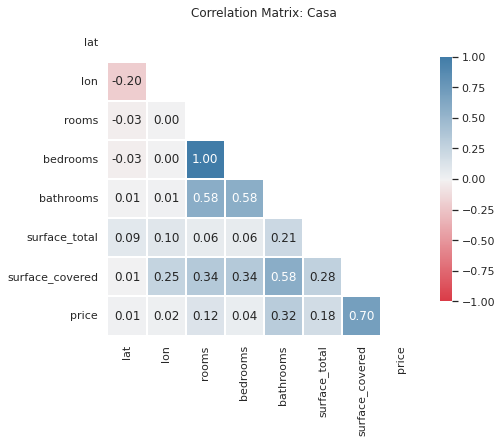

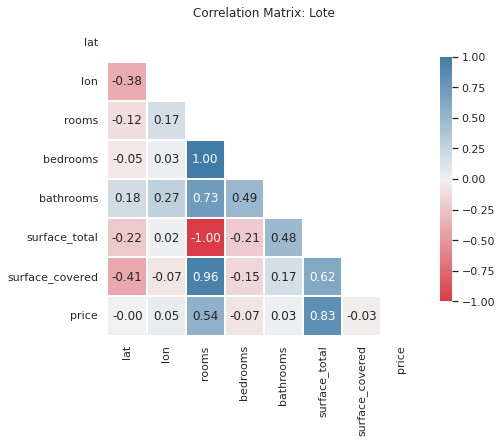

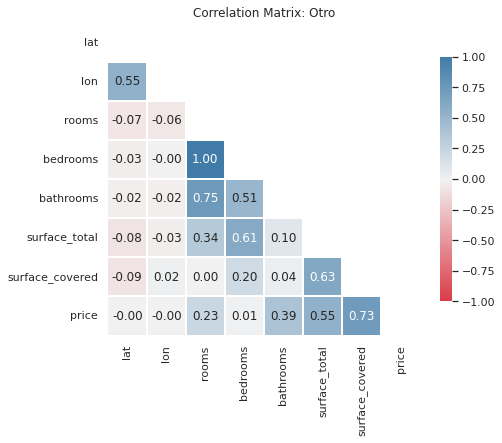

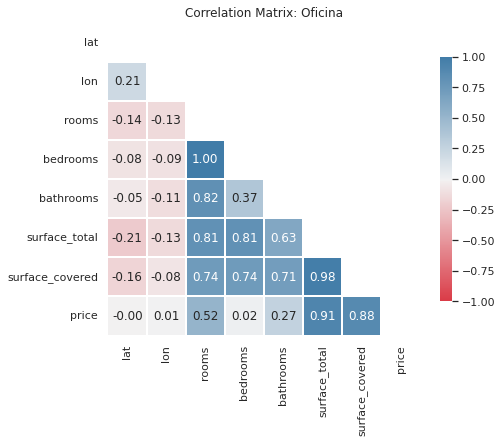

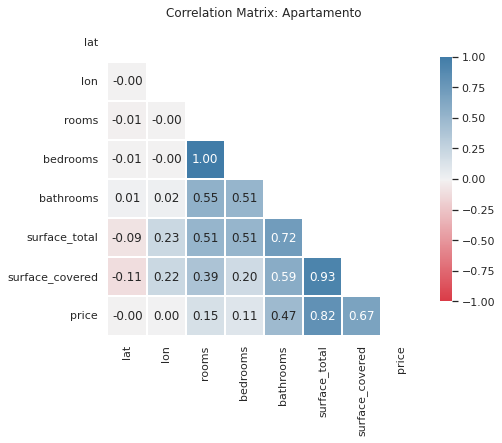

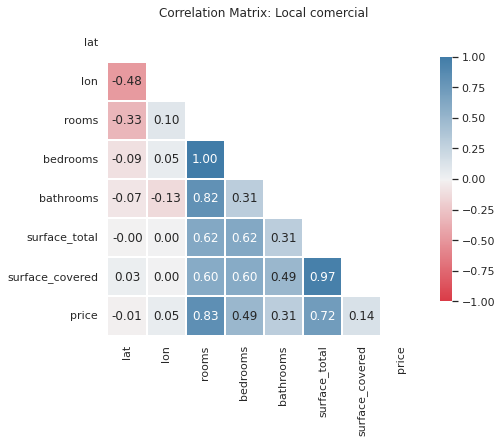

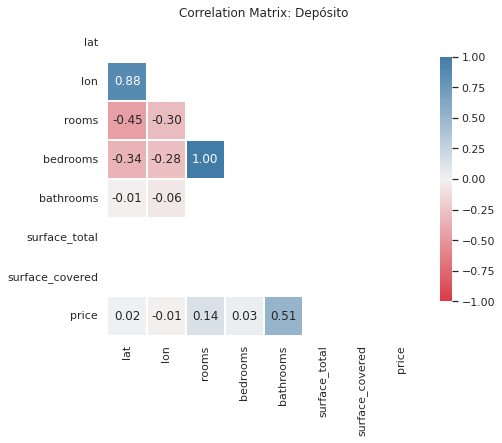

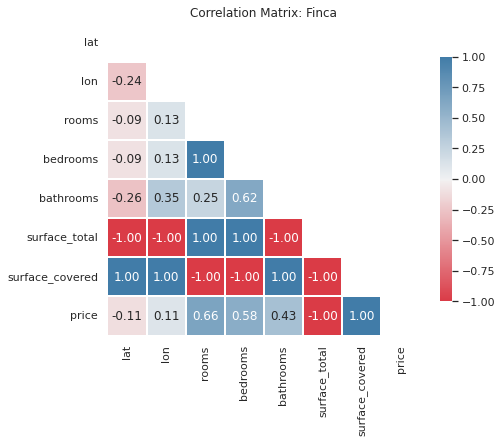

In [62]:
#Correlation matrixes and heat maps by property type

#Dataframe with numeric features
df_bog_numeric = df_bog.select_dtypes(include=[np.number])
df_bog_numeric['property_type'] = df_bog.property_type

property_types = list(df_bog_numeric.property_type.unique())

for i in range(len(property_types)-1):
  # Compute the correlation matrix
  corr = df_bog_numeric[df_bog_numeric['property_type'] == property_types[i]].corr()
  
  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))
  
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(7, 9))
  
  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(10, 240, as_cmap=True)
  
  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
              square=True, linewidths=.5, annot=True, fmt='.2f',
              cbar_kws={"shrink": .5}).set_title('Correlation Matrix: '+property_types[i])
  plt.savefig(image_dir+"corr_matrix_"+property_types[i]+".png", bbox_inches="tight")

From the above correlations we can conclude:

- The price of houses and apartments is positively correlated with the number of bathrooms, rooms, and the total area of the dwelling. This is logically expected.
- There are strong correlations between the different variables, so there may be multicollinearity, especially in apartments.
- Because commercial properties and other types of real estate have behaviors that are not correlated with the available variables and do not use all the variables (for example, a lot does not have bathrooms or bedrooms), we will focus only on houses and apartments.

Now let's see some scatter plots and histograms for these features:

In [63]:
df_bog_residencial = df_bog.query("property_type == 'Casa' or property_type == 'Apartamento'").copy()
df_bog_residencial_numeric = df_bog_residencial.select_dtypes(include=[np.number])
df_bog_residencial_numeric['property_type'] = df_bog_residencial.property_type

In [64]:
df_bog_residencial.shape

(86331, 26)

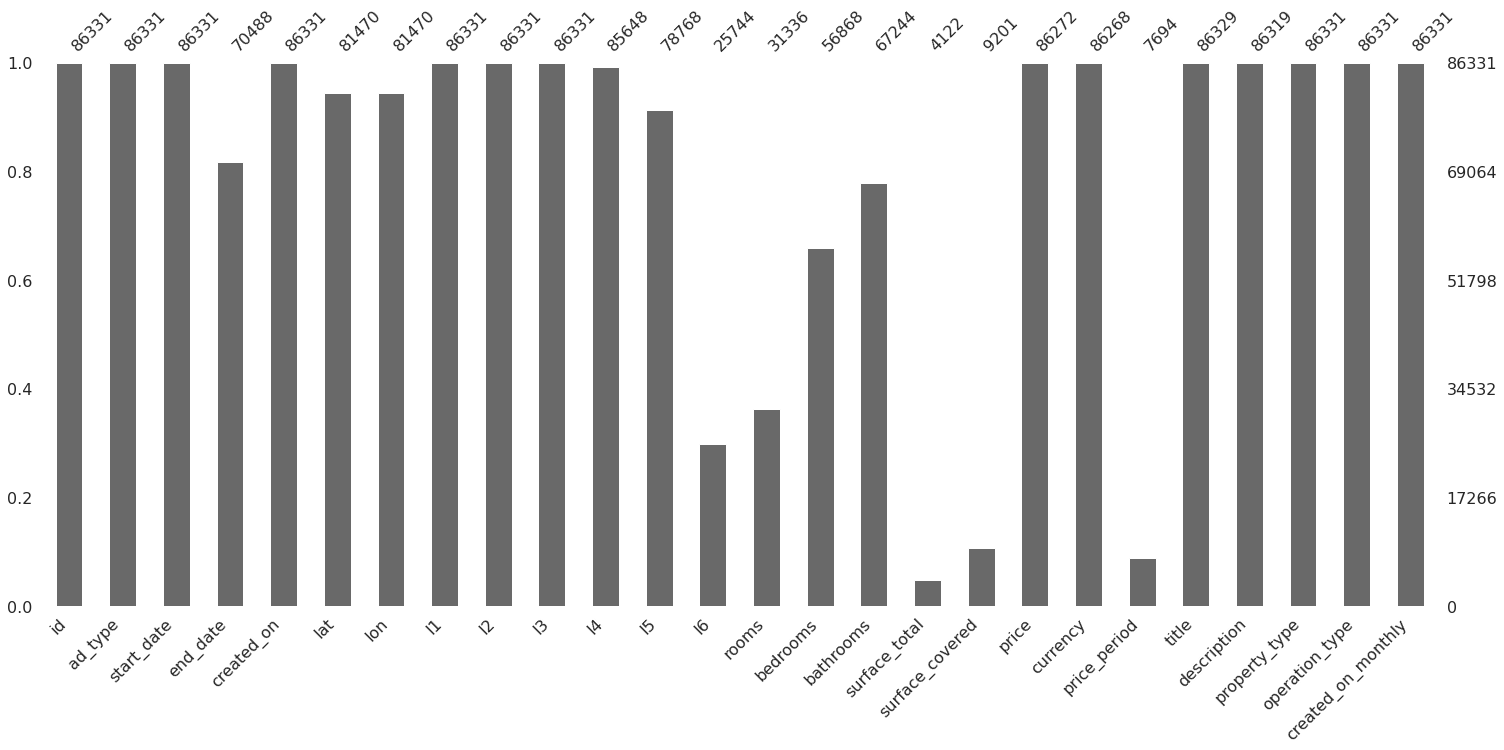

In [65]:
#Missing values in Bogotá
msno.bar(df_bog_residencial)

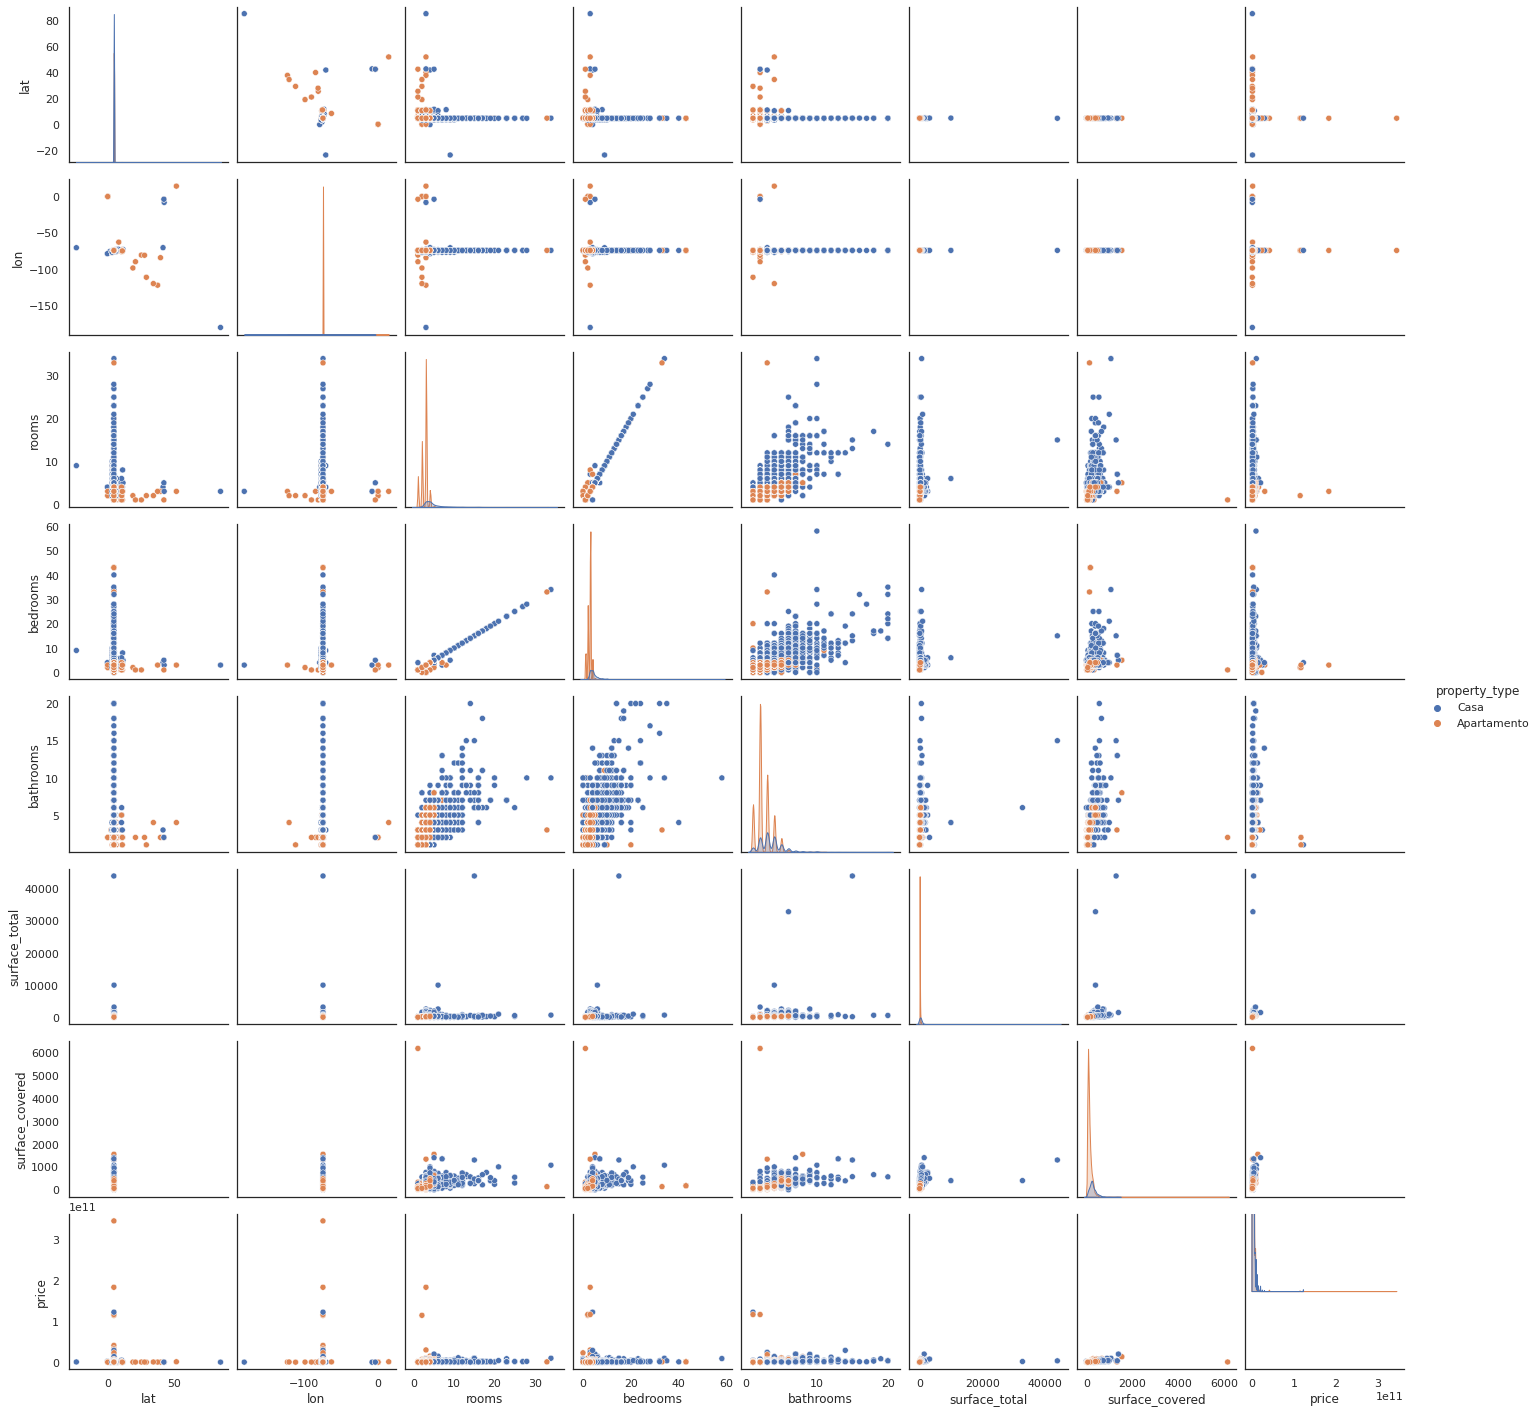

In [66]:
sns.pairplot(df_bog_residencial_numeric, hue='property_type', dropna=True)

Let's see the price distribution:

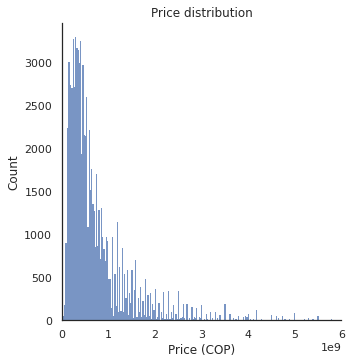

In [75]:
sns.displot(df_bog_residencial_numeric, x="price")
plt.xlim(0, 6000000000)
plt.xlabel('Price (COP)')
plt.ylabel('Count')
plt.title('Price distribution')
plt.savefig(image_dir+"price_distribution.png", bbox_inches="tight")

In [68]:
df_bog_box = df_bog.query("(property_type == 'Casa' or property_type == 'Apartamento') and price > 10000000").copy()

casa = df_bog_box[df_bog_box['property_type'] == "Casa"]
Apartamento = df_bog_box[df_bog_box['property_type'] == "Apartamento"]
# Boxplots by houses
loca = casa["l5"].unique()

fig = go.Figure()

for i in loca:
  y = casa[casa["l5"]==i]
  fig.add_trace(go.Box(
  y=y["price"],
  x=y["l5"],
  name = i
))

fig.update_layout(
    yaxis_title='Price (COP)',
    title = 'House prices by localities',
    yaxis_range = [-100,7000000000]
)

fig.update_xaxes(tickangle=-45)

fig.show()

In [69]:
# Boxplots by apartments
locap = Apartamento["l5"].unique()

figa = go.Figure()

for i in locap:
  x = Apartamento[Apartamento["l5"]==i]
  figa.add_trace(go.Box(
    y=x["price"],
    x=x["l5"],
    name = i
))

figa.update_layout(
    yaxis_title='Price (COP)',
    title = 'Apartment prices by localities',
    yaxis_range = [-100,6000000000]
)
figa.show()

From the above boxplots we could conclude that there are different prices by localties, so the property location could be a relevant feature for the model.

The localties with higher prices are:

- Chapinero
- Usaquén
- Teusaquillo
- La Candelaria

Now let's see a description of this filtered data set with only apartments and houses for sale in Bogotá:

In [70]:
df_bog_residencial.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,86331,86331,SqIQZhnxoPKqMZEyVWAklA==,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_type,86331,1,Propiedad,86331,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_date,86331,371,2021-03-18 00:00:00,1302,2020-07-26,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_date,70488,448,2021-08-06 00:00:00,1941,2020-07-26,2021-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_on,86331,371,2021-03-18 00:00:00,1302,2020-07-26,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,81470.0,NaN,NaN,NaN,NaT,NaT,4.690486,0.524282,-23.660036,4.651303,4.690807,4.718,85.051129
lon,81470.0,NaN,NaN,NaN,NaT,NaT,-74.076776,0.917254,-180.0,-74.102276,-74.061,-74.045477,14.266156
l1,86331,1,Colombia,86331,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2,86331,1,Cundinamarca,86331,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l3,86331,1,Bogotá D.C,86331,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above we can see:

- There are outliers in almost all the numerical variables. Therefore, cases where there are more than 30 rooms or 20 bathrooms, for example, would have to be analyzed in greater depth. These values are much higher than the mean and this could represent a building, a hotel, or other type of property that is out of the scope of the project. So it is necessary to filter the data.
- Almost all variables are skewed to the right.

Now let's review some of these outliers:

In [71]:
#Price outliers with > $7k million COP
price_null=pd.DataFrame(df_bog_residencial[df_bog_residencial['price']>7000000000]).reset_index()
price_null=price_null.filter(['title','description','price','bedrooms','bathrooms'])
price_null.head(20)

,title,description,price,bedrooms,bathrooms
0,APARTAMENTO EN VENTA EN Bogota,En PADS tenemos el placer de presentarte en ve...,1.320000e+10,5.0,8.0
1,APARTAMENTO EN VENTA EN Bogota,En PADS tenemos el placer de presentarte en ve...,1.320000e+10,5.0,8.0
2,BODEGA EN VENTA Y ARRIENDO EN MONTEVIDEO 10.39...,"Área total 10395m2, área de bodegaje 6019m2, á...",4.100000e+10,NaN,NaN
3,VENTA CASA BOGOTA CHICO 450M2,"Casa de 450 mts construidos, 180 aprox de terr...",7.200000e+09,4.0,3.0
4,Casa en El Nogal(Bogota) RAH CO: 21-358,Rentahouse vende Casa en Bogotá D.C. aprovec...,9.500000e+09,15.0,NaN
5,Casalote En Venta En Bogota Santa Bibiana-Usaq...,Inmueble de Clnica muy reconocida que funcion ...,9.800000e+09,34.0,10.0
6,CASA EN VENTA EN Bogota,SANTA PAULA cuatro casas en linea. Ideal para...,7.200000e+09,0.0,NaN
7,Casa En Venta En Bogota Santa Paula-Usaqun Cod...,SANTA PAULA cuatro casas en linea. Ideal para...,7.200000e+09,NaN,NaN
8,Casa En Venta En Bogota Santa Paula-Usaqun Cod...,SANTA PAULA cuatro casas en linea. Ideal para...,7.200000e+09,NaN,NaN
9,Apartamento En Venta En Bogota Chico Norte Ii ...,EXCLUSIVO PENTHOUSE DUPLEX CON TERRAZA DE 97.6...,8.000000e+09,4.0,6.0


In [72]:
#Surface covered outliers with > 1000 m2 
sur_cov_null=pd.DataFrame(df_bog_residencial[df_bog_residencial['surface_covered']>1000]).reset_index()
sur_cov_null=sur_cov_null.filter(['title','description','price','bedrooms','bathrooms', 'surface_covered'])
sur_cov_null

,title,description,price,bedrooms,bathrooms,surface_covered
0,Casalote En Venta En Bogota Santa Bibiana-Usaq...,Inmueble de Clnica muy reconocida que funcion ...,9.800000e+09,34.0,10.0,1073.0
1,Casa En Venta En Bogota La Soledad Cod. VISA10...,"Magnifico Hotel, muy bien ubicado y excelentes...",3.500000e+09,7.0,13.0,1350.0
2,Casa En Venta En Bogota La Candelaria Cod. VLU...,El inmueble cuenta con caractersticas relevant...,3.400000e+09,15.0,15.0,1299.0
3,Apartamento En Venta En Bogota Chico Norte Cod...,Maravilloso Penthouse con exclusivo diseo y vi...,1.350000e+10,5.0,8.0,1550.0
4,Casa En Arriendo/venta En Bogota Chico Orienta...,Magnifica casa de diseo ubicada en un lugar tr...,2.000000e+10,5.0,7.0,1400.0
5,Apartamento En Venta En Bogota El Refugio Cod....,"Lindo apartamento de una alcoba, bao completo...",6.200000e+08,1.0,2.0,6163.0
6,Apartamento En Venta En Bogota La Calleja-Sant...,"Apartamento en venta Bario La Calleja, Edifici...",9.150000e+08,3.0,3.0,1336.0
7,Casa En Venta En Bogota La Soledad Cod. VISA10...,"Magnifico Hotel, muy bien ubicado y excelentes...",3.500000e+09,7.0,13.0,1350.0


In [73]:
#Bathrooms outliers with > 10 
bath_outliers=pd.DataFrame(df_bog_residencial[df_bog_residencial['bathrooms']>10]).reset_index()
bath_outliers=bath_outliers.filter(['title','description','price','bedrooms','bathrooms', 'surface_covered'])
bath_outliers.head()

,title,description,price,bedrooms,bathrooms,surface_covered
0,Casa En Arriendo/venta En Bogota El Nogal Cod....,PADS tiene el placer de presentarte esta magnf...,6.500000e+09,10.0,12.0,462.0
1,"CASA EN VENTA, BOGOTA-CHAPINERO",Casa esquinera remodelada. ambiente acogedor. ...,3.545000e+09,22.0,20.0,NaN
2,CASA EN VENTA EN Bogota,"¡¡OPORTUNIDAD, CASA COMERCIAL EN VENTA!! Const...",1.100000e+09,28.0,17.0,NaN
3,Casa en La Candelaria. 35 habitaciones. 1000.0...,[VEN] ID HOUM: 39107\nHermosa casa con un área...,3.500000e+09,35.0,20.0,NaN
4,CASA EN VENTA EN Bogota,VENTA Casa La Candelaria excelente oportunidad...,3.600000e+09,32.0,20.0,NaN


We can see that there are some properties marked as 'Apartment' or 'House' but actually, they are other types like hotels, buildings, lots, etc. It would be useful to analyze deeply the title and description to extract more information.

Finally, we analyze the median price over time to see if there is any pattern. In the next plot, we can see that there could be seasonality and that the apartments' price is lower than the houses almost all the time.

In [74]:
trendcasa = casa.groupby(["start_date"])["price"].median().reset_index()
trendapto = Apartamento.groupby(["start_date"])["price"].median().reset_index()

trends = go.Figure()
trends.add_trace(go.Scatter(
    name="Houses",
    mode="markers+lines", x=trendcasa["start_date"], y=trendcasa["price"],
))
trends.add_trace(go.Scatter(
    name="Apartments",
    mode="markers+lines", x=trendapto["start_date"], y=trendapto["price"],
))
trends.update_layout(
    yaxis_title='Median Price (COP)',
    title = 'Median price trend by date of registration')

In [ ]:
df_bog_residencial.to_csv('/content/drive/MyDrive/DS4A/data/interim/df_bog_residencial.csv', index=False)